# Test set inference

Run YOLO predictions on a random subset of `data/processed/images/test` using the trained weights in `models/best_model.pt`. Results are displayed inline (no files are written).


In [14]:
from pathlib import Path
import random
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from ultralytics import YOLO

In [15]:
model_path = Path("../models/best_model.pt")
test_dir = Path("../data/processed/images/test")

In [16]:
image_exts = {".jpg", ".jpeg", ".png"}
test_images = sorted(p for p in test_dir.iterdir() if p.suffix.lower() in image_exts)
if not test_images:
    raise FileNotFoundError(f"No test images found in {test_dir.resolve()}")

print(f"{len(test_images)} test images found in {test_dir.resolve()}")

sample_size = 5
rng = random.Random(0)  # reproducible sample
selected = rng.sample(test_images, k=min(sample_size, len(test_images)))

model = YOLO(model_path)
results = model.predict(
    [str(p) for p in selected],
    imgsz=640,
    conf=0.35,
    iou=0.5,
    save=False,
)


738 test images found in /Users/fatimatatanda/Library/CloudStorage/OneDrive-Personal/CLOUD/AI/projects/cv_human_detection/data/processed/images/test

0: 640x640 1 person, 35.2ms
1: 640x640 1 person, 35.2ms
2: 640x640 3 persons, 35.2ms
3: 640x640 2 persons, 35.2ms
4: 640x640 1 person, 35.2ms
Speed: 1.3ms preprocess, 35.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


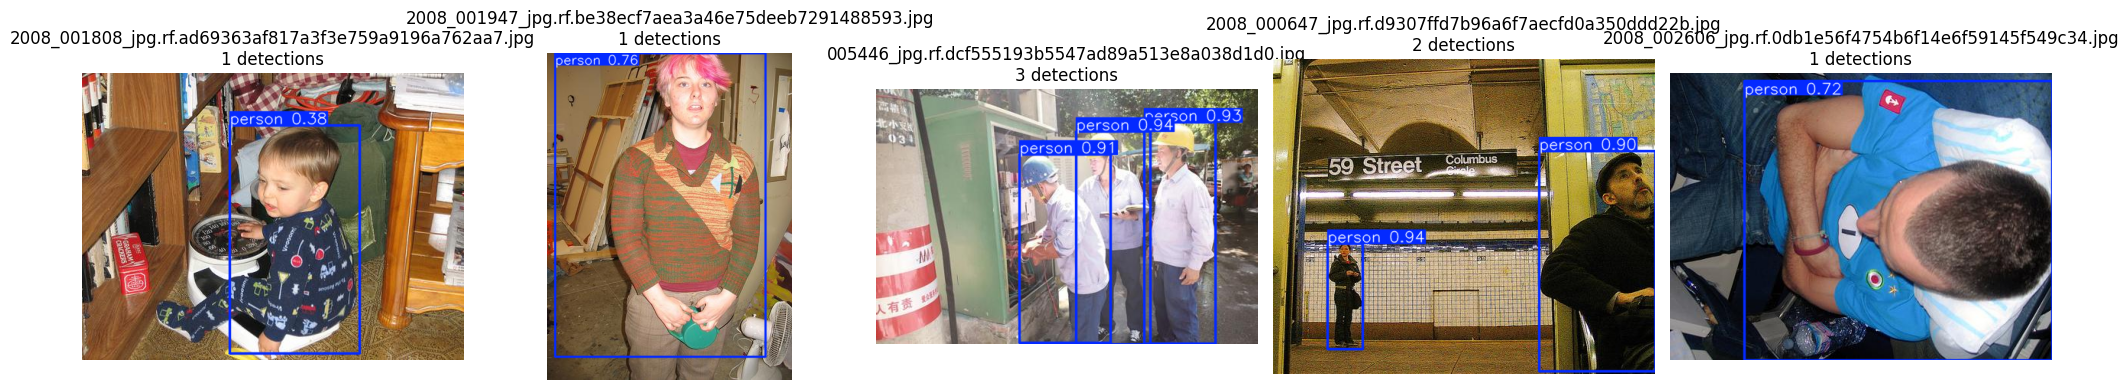

In [12]:
num_imgs = len(results)
fig, axes = plt.subplots(1, num_imgs, figsize=(4 * num_imgs, 4))

# If only one image, axes is not iterable
if num_imgs == 1:
    axes = [axes]

for ax, img_path, res in zip(axes, selected, results):
    annotated = Image.fromarray(res.plot()[:, :, ::-1])  # BGR → RGB
    ax.imshow(annotated)
    ax.set_title(f"{img_path.name}\n{len(res.boxes)} detections")
    ax.axis("off")

plt.tight_layout()
plt.show()